Processing directory: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00


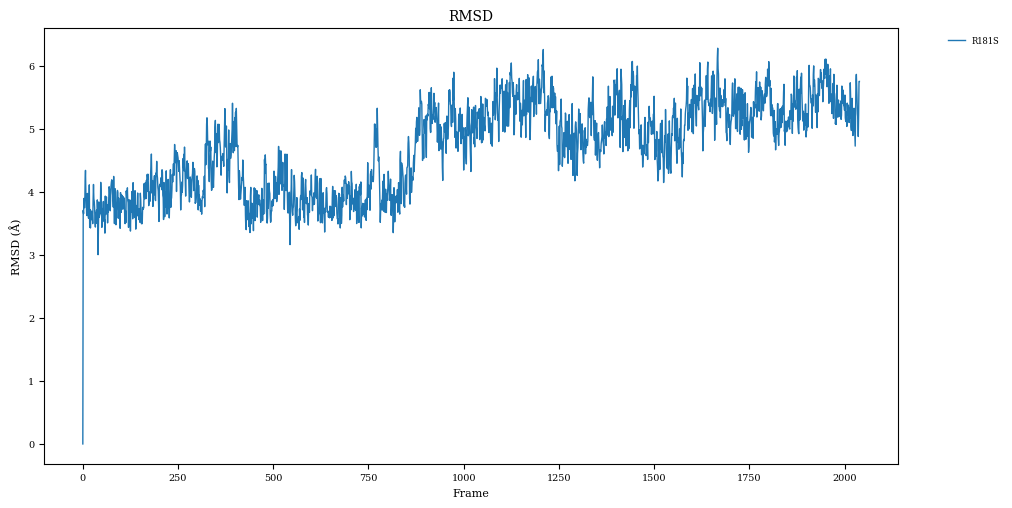

In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configure JACS-style plot aesthetics
rcParams.update({
    "font.size": 8,             # Adjust font size for publication
    "font.family": "serif",     # Use serif font (e.g., Times New Roman)
    "axes.labelsize": 8,        # Label font size
    "axes.titlesize": 10,       # Title font size
    "legend.fontsize": 6,       # Legend font size
    "xtick.labelsize": 7,       # X-axis tick label size
    "ytick.labelsize": 7,       # Y-axis tick label size
    "lines.linewidth": 1,       # Line width for plots
    "figure.figsize": (10, 5),  # Double-column figure dimensions in inches
})

# List of directories containing the combined_trajectory.dcd file
directories = [
    "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00",
]

# Define colors for each directory's plot
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Distinct but minimalistic colors

# Set up the plot
plt.figure()

# Loop through each directory and process the combined_trajectory.dcd file
for i, data_path in enumerate(directories):
    print(f"Processing directory: {data_path}")
    
    # Extract the folder name for labeling
    folder_name = os.path.basename(os.path.dirname(data_path))
    
    # Define the path to the combined_trajectory.dcd file
    dcd_file = os.path.join(data_path, "combined.dcd")
    
    # Reference PDB file
    #pdb_file = os.path.join(data_path, "equil.pdb")  # The PDB file in the same folder
    pdb_file = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/minim/minim.pdb"
    #pdb_file = "/home/hp/results/C49U/H144Q/replica000/equil_thermostat.pdb"
    #pdb_file = "/home/hp/results/C49U/H144Q/replica000/equil.pdb"


    # Check if the .dcd file exists
    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found.")
        continue
    
    # Load the reference structure
    u = mda.Universe(pdb_file, dcd_file)  # Load the combined trajectory
    
    # Set up an RMSD analysis object
    rmsd_analysis = RMSD(u, u, select="backbone")  # Calculate RMSD for backbone atoms
    rmsd_analysis.run()
    
    # Convert RMSD to angstroms
    rmsd_angstroms = rmsd_analysis.rmsd[:, 2] * 10  # Multiply by 10 to convert nm to Å
    
    # Plot the RMSD for the current trajectory
    plt.plot(rmsd_angstroms, label=f"{folder_name}", color=colors[i])

# Customize the plot
plt.xlabel("Frame")
plt.ylabel("RMSD (Å)")
plt.title("RMSD")
plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(1.05, 1))  # Legend outside plot
plt.tight_layout(pad=0.5)  # Adjust layout for publication

# Save the plot as a high-quality vector graphic
#output_plot_path = "/home/hp/results/C49U/rmsd_plot_combined_trajectories_angstroms.pdf"
#plt.savefig(output_plot_path, format="pdf", dpi=300)  # Save as PDF for publication
plt.show()

#print(f"RMSD plot saved as {output_plot_path}")



Processing directory: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00


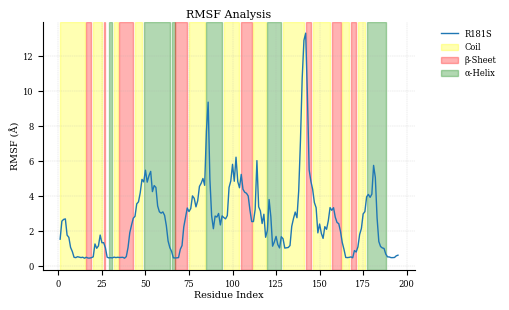

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSF
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, patches

# Configure JACS-style aesthetics
rcParams.update({
    "font.size": 7,
    "font.family": "serif",
    "axes.labelsize": 7,
    "axes.titlesize": 8,
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "lines.linewidth": 1,
    "figure.figsize": (5, 3), 
    "axes.spines.top": False,
    "axes.spines.right": False
})

# Directories containing the trajectory files
directories = ["/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00"]

# Path to the reference PDB file
pdb_file = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/minim/minim.pdb"

# Define the color scheme (original colors retained)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Store all RMSF data
all_residues_data = []

if not os.path.exists(pdb_file):
    print(f"Error: Reference PDB file not found at {pdb_file}.")
    exit()

# Process each directory
for i, data_path in enumerate(directories):
    print(f"\nProcessing directory: {data_path}")
    folder_name = os.path.basename(os.path.dirname(data_path))
    dcd_file = os.path.join(data_path, "combined.dcd")

    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found.")
        continue

    # Load trajectory
    try:
        u = mda.Universe(pdb_file, dcd_file)
    except Exception as e:
        print(f"Error loading trajectory: {e}")
        continue

    ca_atoms = u.select_atoms("name CA")
    if len(u.trajectory) == 0 or len(ca_atoms) == 0:
        print("Skipping RMSF calculation due to empty trajectory or missing Cα atoms.")
        continue

    # Compute RMSF
    try:
        rmsf_analysis = RMSF(ca_atoms).run()
    except Exception as e:
        print(f"Error during RMSF calculation: {e}")
        continue

    rmsf_angstroms = rmsf_analysis.rmsf * 10
    residue_indices = [res.resid for res in ca_atoms.residues]

    # Store results
    for residue_idx, rmsf_value in zip(ca_atoms.residues, rmsf_angstroms):
        all_residues_data.append({"Folder": folder_name, "Residue_Index": residue_idx.resid, "RMSF (Å)": rmsf_value})

    # Plot
    plt.plot(residue_indices, rmsf_angstroms, label=folder_name, color=colors[i % len(colors)])

# Secondary Structure Annotations (Original Colors)
ss_regions = [
    (1, 15, 'yellow', "Coil"),
    (16, 19, 'red', "β-Sheet"),
    (20, 25, 'yellow', ""),
    (26, 27, 'red', ""),
    (29, 31, 'green', "α-Helix"),
    (32, 34, 'yellow', ""),
    (35, 43, 'red', ""),
    (44, 48, 'yellow', ""),
    (49, 64, 'green', ""),
    (65, 67, 'green', ""),
    (67, 74, 'red', ""),
    (75, 84, 'yellow', ""),
    (85, 94, 'green', ""),
    (95, 104, 'yellow', ""),
    (105, 111, 'red', ""),
    (112, 119, 'yellow', ""),
    (120, 128, 'green', ""),
    (129, 141, 'yellow', ""),
    (142, 145, 'red', ""),
    (146, 156, 'yellow', ""),
    (157, 162, 'red', ""),
    (163, 167, 'yellow', ""),
    (168, 171, 'red', ""),
    (172, 176, 'yellow', ""),
    (177, 188, 'green', ""),
]

for start, end, color, label in ss_regions:
    plt.axvspan(start, end, zorder=0, alpha=0.3, color=color, label=label if label else None)

# Clean legend with only unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), frameon=False, loc="upper left", bbox_to_anchor=(1.05, 1))

# Axis labels and formatting
plt.xlabel("Residue Index", labelpad=2)
plt.ylabel("RMSF (Å)", labelpad=2)
plt.title("RMSF Analysis", fontsize=8, pad=3)

# Grid (light dashed lines)
plt.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)

# Tight layout for JACS formatting
plt.tight_layout(pad=0.5)

# Save and show
# plt.savefig("/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/output.pdf", format="pdf", dpi=600)
plt.show()
